# __Практическое задание модуля PY-13 (юнит 9)__

SkillFactory Data Science PRO Кисляков С.В. (DSPR-107) 06.12.2022


## Описание задачи и данных

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline
plt.style.use('default')

In [115]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Столбцы таблицы

1. `RowNumber` — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)<br><br>
1. `CustomerId` — идентификатор клиента<br><br>
1. `Surname` — фамилия клиента<br><br>
1. `CreditScore` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)<br><br>
1. `Geography` — страна клиента (банк международный)<br><br>
1. `Gender` — пол клиента<br><br>
1. `Age` — возраст клиента<br><br>
1. `Tenure` — сколько лет клиент пользуется услугами банка<br><br>
1. `Balance` — баланс на счетах клиента в банке<br><br>
1. `NumOfProducts` — количество услуг банка, которые приобрёл клиент<br><br>
1. `HasCrCard` — есть ли у клиента кредитная карта (1 — да, 0 — нет)<br><br>
1. `IsActiveMember` — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)<br><br>
1. `EstimatedSalary` — предполагаемая заработная плата клиента<br><br>
1. `Exited` — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)*<br><br>


### Проектный кейс

* Вам предстоит подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.<br><br>
* Для визуализации вы можете использовать любую из изученных библиотек.<br><br>
* Перед выполнением задания обязательно подумайте, какие признаки в данных являются числовыми, а какие — категориальными. Это поможет вам построить правильный график (ещё раз взгляните на схему выбора графика).<br><br>
* При выполнении заданий обязательно придерживайтесь критериев правильной визуализации, приведённых в юните «Искусство визуализации».

### Метрики качества

* В файле должно содержаться 10 графиков — 10 ответов к заданиям.<br><br>
* Каждый график и преобразования к нему выполняются в отдельной ячейке.<br><br>
* Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.<br><br>

## ЗАДАНИЯ

1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.<br><br>
2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.<br><br>
3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.<br><br>
4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?<br><br>
5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.<br><br>
6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.<br><br>
Подсказка<br><br>
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу `Exited` (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).<br><br>
7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.<br><br>
8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?<br><br>
9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.<br><br>
10. Переведите числовой признак `CreditScore` в категориальный. Для этого воспользуйтесь функцией `get_credit_score_cat()`, которая приведена ниже. Примените её к столбцу `CreditScore` и создайте новый признак `CreditScoreCat` — категории кредитного рейтинга.<br><br>


```python
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (`CreditScoreCat`), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (`Tenure`). В ячейках сводной таблицы должно находиться среднее по признаку оттока (`Exited`) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

# РЕШЕНИЯ

## Предобработка данных

In [116]:
# Добавялем новый признак 'Outflow' (Отток)
churn_data['Outflow'] = churn_data['Exited'].apply(
    lambda x: 'Departed' if x else 'Loyal').astype('category')

## 9.1 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

### Решение

Всего клиентов: 10000


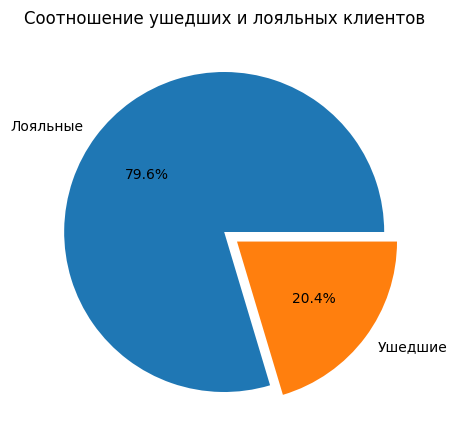

In [117]:
ratio_depart_loyal = churn_data['Outflow'].value_counts()
ratio_depart_loyal.index = ['Лояльные', 'Ушедшие']
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio_depart_loyal,
    labels=ratio_depart_loyal.index,
    autopct='%.1f%%',
    explode = [0, 0.1]
);
axes.set_title('Соотношение ушедших и лояльных клиентов');
print(f"Всего клиентов: {ratio_depart_loyal.sum()}")

### Выводы

За отчетный период банк потерял 20.4 % клиентов, что является высоким показателем и свидетельствует о необходимости принятия неотложных мер.

## 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

### Решение

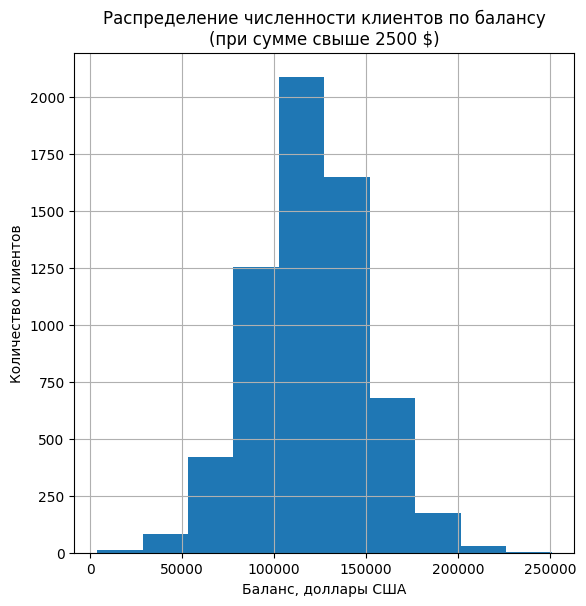

In [118]:
mask=churn_data['Balance'] >= 2500
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.grid()
balance_groups = axes.hist(
    x=churn_data[mask]['Balance'],
    bins=10
    );
axes.set_title('Распределение численности клиентов по балансу\n(при сумме свыше 2500 $)');
axes.set_xlabel('Баланс, доллары США')
axes.set_ylabel('Количество клиентов');

### Выводы

* Наибольшая по численности группа клиентов (около половины) имеет баланс от 75 тыс. до 150 тыс. долларов США.
* Также большая группа клиентов (около 10% от общего числа) имеет баланс от 150 тыс. до 200 тыс. долларов США.
* около 30 % от общего числа клиентов не отражены на графике, т.к. имеют баланс менее 2,5 тыс. долларов США.

(общее число клиентов банка - 10 000 чел.)

## 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

### Решение

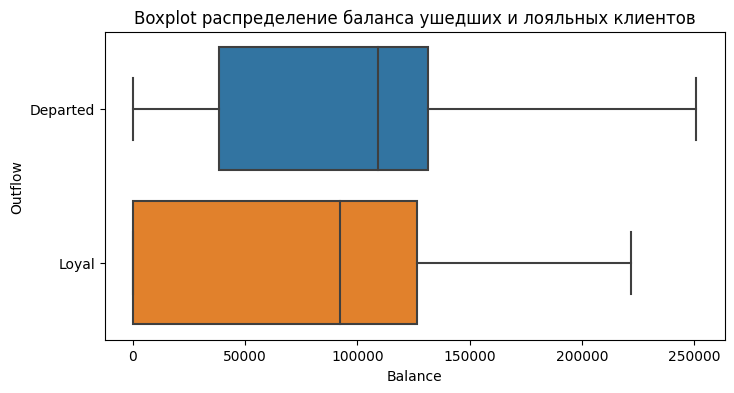

In [119]:
fig = plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Outflow'
)
boxplot.set_title(
    'Boxplot распределение баланса ушедших и лояльных клиентов');


### Выводы

Большинство среди ушедших клиентов имеют баланс от 50 тыс. до 125 тыс. долларов США и относятся к основному сегменту целевой аудитории банка (наиболее многочисленной группе клиентов, из денежных средств которых складывается баланс банка). 

Данный показатель может быть связан с сомнениями клиентов в надежности кредитно-финансовой организации, либо с появлением на рынке значительно более выгодных предложений банковских услуг.

## 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

### Решение

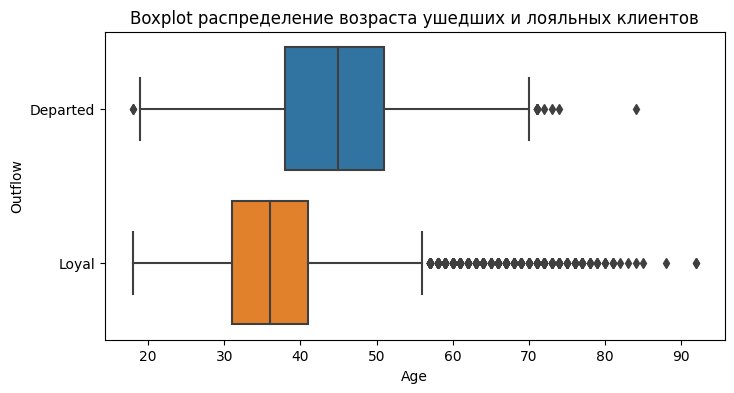

In [120]:
fig = plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Outflow'
)
boxplot.set_title(
    'Boxplot распределение возраста ушедших и лояльных клиентов');

### Выводы

Потенциальные выбросы сведений о возрасте преобладают в данных о лояльных клиентах банка.

Среди ушедших клиентов преобладает возрастная группа от 40 до 50 лет - период средней зрелости (т.н. "акме"). С учетом социально-психологической характеристики данной группы, вероятно, причиной отказа от услуг является утрата доверия к надежности кредитно-финансовой организации.

## 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

### Решение

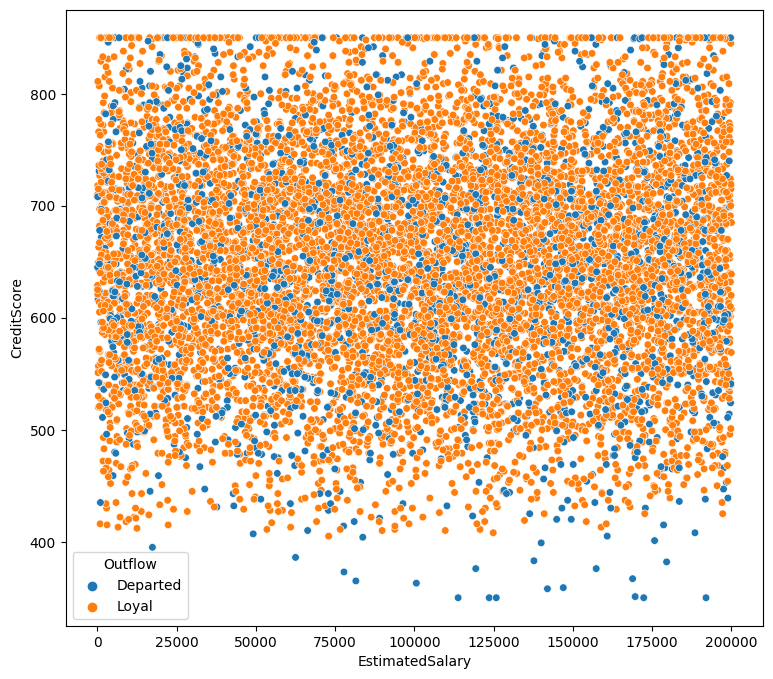

In [121]:
fig = plt.figure(figsize=(9, 8))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Outflow',
    s=30
)

### Выводы

На графике не прослеживается взаимосвязи между кредитным рейтингом клиента, его предполагаемой зарплатой и лояльностью банку.

## 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу `Exited` (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов)

### Решение

In [122]:
# Группировка данных для получения % ушедших
# в каждой гендерной группе
churn_gender = churn_data.groupby(
    'Gender').mean(numeric_only=True)['Exited']

fig = px.bar(
    data_frame=churn_gender,
    x=churn_gender.index,
    y=churn_gender,
    color=churn_gender.index,
    labels={'Gender': '', 'y': 'Доля от численности группы'},
    category_orders={'Gender': ['Male', 'Female']},
    title='Отток клиентов в гендерных группах',
    width=500,
    height=600   
)

fig.update_layout(yaxis_tickformat='.0%')

# Настройка шаблона наведения курсора мыши
fig.update_traces(
    hovertemplate="Отток в группе: %{y:.1%}"
)
fig.show();

### Выводы

Чаще всего отказываются от услуг банка клиенты женского пола.

## 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

### Решение

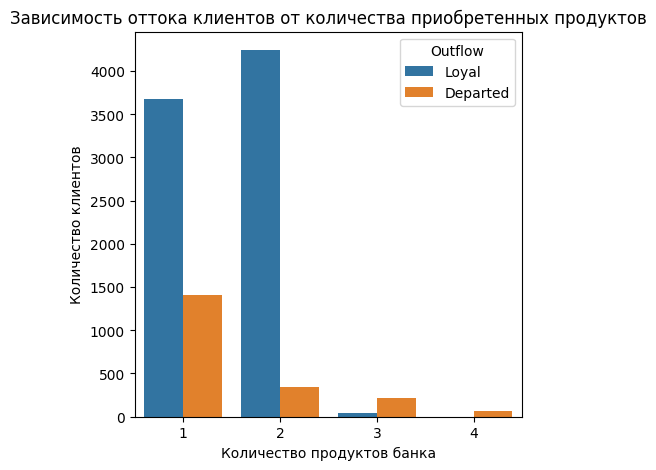

In [123]:
fig=plt.figure(figsize=(5, 5))
countplot = sns.countplot(
    data=churn_data,
    x='NumOfProducts',
    hue='Outflow',
    hue_order=['Loyal', 'Departed']
)
countplot.set_title('Зависимость оттока клиентов от количества приобретенных продуктов');
countplot.set_xlabel('Количество продуктов банка')
countplot.set_ylabel('Количество клиентов');


### Выводы

* Чаще всего банк покидают клиенты, воспользовавшиеся одной его услугой.
* В результате оттока не осталось немногочисленной группы клиентов, которые приобрели 4 услуги банка.


## 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

### Решение

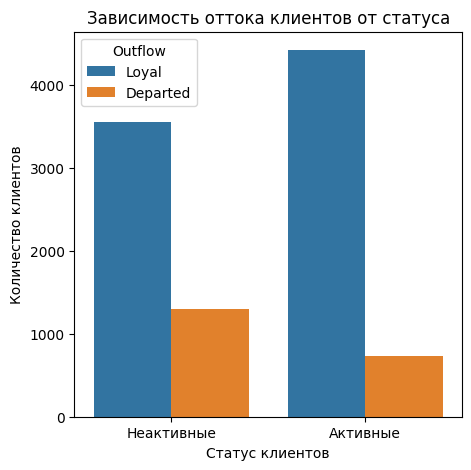

In [124]:
fig=plt.figure(figsize=(5, 5))
countplot = sns.countplot(
    data=churn_data,
    x='IsActiveMember',
    hue='Outflow',
    hue_order=['Loyal', 'Departed']
)
countplot.set_title('Зависимость оттока клиентов от статуса');
countplot.set_xlabel('Статус клиентов')
countplot.set_ylabel('Количество клиентов')
countplot.set_xticklabels(['Неактивные', 'Активные']);

### Выводы

Неактивные клиенты покидают банк практически в два раза чаще. 

С целью уменьшения их числа, возможно, необходимо заинтересовать таких клиентов новыми услугами.

## 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

### Решение

In [125]:
# Сводная таблица оттока клиентов по странам 
share_by_country = churn_data.pivot_table(
    index='Geography',
    columns='Outflow',
    values='CustomerId',
    aggfunc='count'
)

# Добавляем признак доли ушедших клиентов в % от общего количества.
share_by_country['ShareDeparted'] = (
    share_by_country['Departed'] / 
    ((share_by_country['Departed'] + share_by_country['Loyal']) / 100)
    ).round(1)

fig=px.choropleth(
    data_frame=share_by_country,
    locations=share_by_country.index,
    locationmode='country names',
    color='ShareDeparted',
    color_continuous_scale='Reds',
    title='Отток клиентов по странам (%)',
    scope='europe',
    hover_name='ShareDeparted',
    hover_data={'ShareDeparted': False},
    width=600, 
    height=500, 
)

fig.show()

### Выводы

Наибольшая доля ушедших клиентов наблюдается в Германии (около 32 % от общего числа), возможно, это связано с утратой банком активов в указанной стране.

## 9.10

Переведите числовой признак `CreditScore` в категориальный. Для этого воспользуйтесь функцией `get_credit_score_cat()`, которая приведена ниже. Примените её к столбцу `CreditScore` и создайте новый признак `CreditScoreCat` — категории кредитного рейтинга.


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (`CreditScoreCat`), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (`Tenure`). В ячейках сводной таблицы должно находиться среднее по признаку оттока (`Exited`) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [126]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

### Решение

In [135]:
# Добавление категорий кредитного рейтинга
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(
    get_credit_score_cat).astype('category')

#### Вариант 1 (`seaborn`)

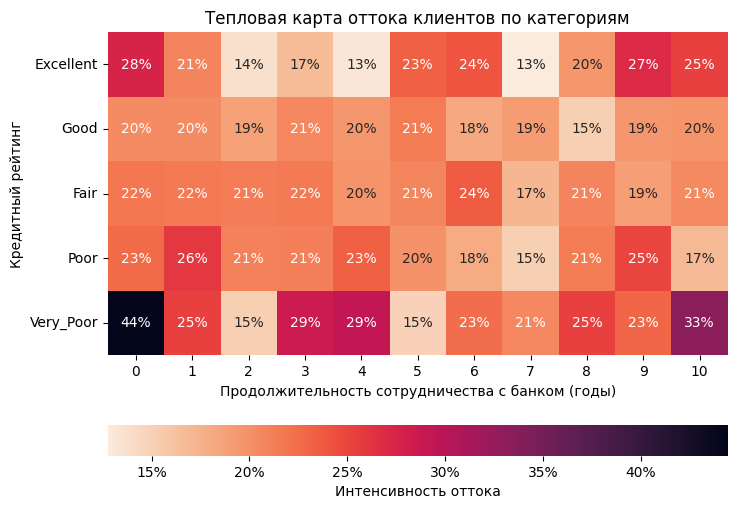

In [139]:
pivot = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited', 
)

# сортировка сводной таблицы по рейтингу клиентов 
# (в соответствии со списком credit_rate)
credit_rate = [
    'Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor'
]
pivot['CreditRate'] = pivot.index
pivot['CreditRate'] = pivot['CreditRate'
                            ].cat.set_categories(credit_rate)
pivot=pivot.sort_values(['CreditRate'])
pivot=pivot.drop(columns=['CreditRate'])


# форматирование тиков colorbar
formatter = matplotlib.ticker.FuncFormatter(
    lambda x, pos: f"{round(x*100)}%"
)


fig=plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    data=pivot, 
    cmap='rocket_r',
    cbar_kws=dict(
        label="Интенсивность оттока", 
        orientation='horizontal',
        format=formatter
    ),
    annot=True,
    fmt='.0%'
)
heatmap.set_title('Тепловая карта оттока клиентов по категориям')
heatmap.set_xlabel('Продолжительность сотрудничества с банком (годы)')
heatmap.set_ylabel('Кредитный рейтинг')
plt.yticks(rotation=0);


#### Вариант 2 (`plotly.express`)

In [131]:
fig = px.density_heatmap(
    data_frame=churn_data,
    x='Tenure',
    y='CreditScoreCat',
    z='Exited',
    
    # Порядок отображения категорий на графике
    category_orders=dict(
        CreditScoreCat=[
            'Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor'
        ]
    ),
    
    # Назавания осей
    labels=dict(
        Tenure='Продолжительность сотрудничества с банком (годы)',
        CreditScoreCat='Кредитный рейтинг',
    ),
    
    color_continuous_scale='blues',  # цветовая гамма
    histfunc='avg',  # среднее по z
    # text_auto = '.0%',  # аннотация на графике (процент ушедших) 
    title="Тепловая карта оттока клиентов по категориям",
    template='none',  # тема форматирования графика
    width=800,
    height=600,
)

fig.update_layout(
    autosize=False,  # автоматический размер откл.
    xaxis_dtick=1,  # шаг тиков на оси x
    # Настройка легенды (colorbar)
    coloraxis_colorbar=dict(
        title=dict(
            text='Интенсивность оттока',
            side='bottom'
        ),
        orientation='h',
        x=0.5,
        y=-0.4,
        len=1,
        tickformat='.0%',
        ypad=20,  # отступ снизу
        dtick=0.1  # шаг тиков
    ),
    # Настройка отступов графика
    margin=dict(
       autoexpand=False,
       t=50,
       b=150,
       r=20,
    ), 
)

# Настройка шаблона наведения курсора мыши
fig.update_traces(
    hovertemplate="Отток %{z:.0%}"
)



fig.show()

#### Вариант 3 (`plotly.graph_objects`)

In [137]:
# Сортировка основной таблицы оттока клиентов по категориям
# (для соблюдения порядка отображения на графике)
credit_rate = [
    'Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor'
]

churn_data['CreditScoreCat'] = churn_data[
        'CreditScoreCat'].cat.set_categories(credit_rate)
churn_sorted = churn_data.sort_values('CreditScoreCat')

# Интенсивность оттока клиентов по категориям (%)
intensity_outflow_cat_df = pd.DataFrame()
# Цикл для получения размерности фрейма соответствующей графику
# (для отображения в hover data)
for col in range(0, 11):
    intensity_outflow_cat_df[col] = churn_sorted.groupby(
        'CreditScoreCat').mean(numeric_only=True)['Exited']

# Количество ушедших клиентов банка    
num_departed = churn_sorted[
        churn_sorted['Outflow'] == 'Departed'
    ].shape[0]

# Доля каждой категории в оттоке клиентов банка (%)
share_cat_in_outflow_bank_df = pd.DataFrame()
for col in range(0, 11):
    share_cat_in_outflow_bank_df[col] = churn_sorted.groupby(
        'CreditScoreCat').sum(numeric_only=True)['Exited']
share_cat_in_outflow_bank_df = (
    share_cat_in_outflow_bank_df / num_departed)

# Сортировка фреймов для отображения 
# категорий кредитного рейтинга на графике "сверху вниз"
churn_sorted = churn_sorted.sort_values(
    'CreditScoreCat', ascending=False)
intensity_outflow_cat_df = intensity_outflow_cat_df.sort_values(
    'CreditScoreCat', ascending=False)
share_cat_in_outflow_bank_df = share_cat_in_outflow_bank_df.sort_values(
    'CreditScoreCat', ascending=False)

# Массив для отображения в hover data
customdata=np.dstack(
    (
        intensity_outflow_cat_df,
        share_cat_in_outflow_bank_df
    )
)

# Построение графика
fig = go.Figure(
    data=go.Histogram2d(
        x=churn_sorted['Tenure'],
        y=churn_sorted['CreditScoreCat'],
        z=churn_sorted['Exited'],
        histfunc='avg',  # среднее
        customdata=customdata,
        hovertemplate='<br>'.join(
            ["Сотрудничество (годы): %{x}; отток %{z:.0%}",
             "Отток в категории %{y}: %{customdata[0]:.0%}",
             "Доля категории в оттоке банка: %{customdata[1]:.0%}"]),
        colorscale='blues',
        name='',
        colorbar=dict(
            title=dict(
                text='Интенсивность оттока',
                side='bottom'
            ),
            orientation='h',
            x=0.5,
            y=-0.35,
            len=1,
            tickformat='.0%',
            ypad=20,  # отступ снизу
            dtick=0.1  # шаг тиков
        )
    ),
    layout=go.Layout(
        title=dict(
            text='Тепловая карта оттока клиентов по категориям',
            pad_l=200,
        ),
        xaxis=dict(
            title=dict(
                standoff=0,  # отступ заголовка от оси
                text='Продолжительность сотрудничества с банком (годы)'
            ),
            dtick=1,
        ),
        yaxis=dict(
            title=dict(
                standoff=0,
                text='Кредитный рейтинг'
            )
        ),
        margin=dict(
            autoexpand=False,  # автоматическое выравнивание выкл.
            t=100,
            b=120,
            l=100,
            r=20
        ), 
        width=800,
        height=600,
        hovermode='y unified',
        autosize=False,  # автоматический размер выкл.
    )
)

fig.show()

### Выводы

* Лояльность клиентов мало зависит от продолжительности сотрудничества с банком.
* Наибольшая интенсивность оттока - 24% - среди клиентов с самым низким рейтингом (`Very poor`) , чаще всего покидают банк клиенты этой категории, сотрудничавшие с ним менее года (отток 44 %). При этом отток клиентов категории `Very poor` является наименее ощутимым для банка, т.к. составлят 7% от общего количества нелояльных клиентов.
* Интенсивность оттока клиентов категории `Good` не зависит от продолжительности сотрудничества и является самой низкой среди категорий кредитного рейтинга (19%). При этом отток клиентов данной категории является наиболее ощутимым для банка, т.к. он составляет 35% от общего количества нелояльных клиентов. 